--- Naive Bayes ---
Accuracy : 0.9721973094170404
Precision: 0.9916666666666667
Recall   : 0.7986577181208053
F1-score : 0.8847583643122676

Classification Report:

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       0.99      0.80      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115

--- Logistic Regression ---
Accuracy : 0.9632286995515695
Precision: 1.0
Recall   : 0.7248322147651006
F1-score : 0.8404669260700389

Classification Report:

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       966
        spam       1.00      0.72      0.84       149

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



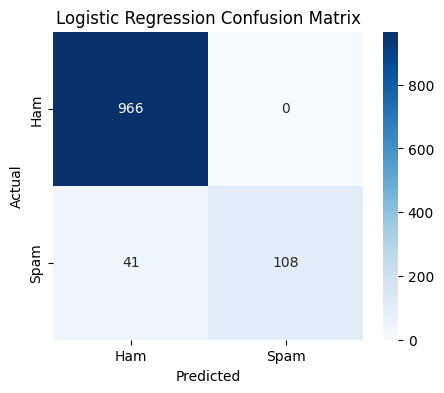

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(
    "../data/SMSSpamCollection",
    sep="\t",
    header=None,
    names=["label", "text"]
)

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

df["clean_text"] = df["text"].apply(clean_text)

vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df["clean_text"])
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

nb_preds = nb_model.predict(X_test)
lr_preds = lr_model.predict(X_test)

def evaluate_model(name, y_true, y_pred):
    print(f"--- {name} ---")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, pos_label="spam"))
    print("Recall   :", recall_score(y_true, y_pred, pos_label="spam"))
    print("F1-score :", f1_score(y_true, y_pred, pos_label="spam"))
    print("\nClassification Report:\n")
    print(classification_report(y_true, y_pred))

evaluate_model("Naive Bayes", y_test, nb_preds)
evaluate_model("Logistic Regression", y_test, lr_preds)

cm = confusion_matrix(y_test, lr_preds)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Ham", "Spam"],
            yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()
